AI_18_조현식_section1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
df_vgame = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv")

In [3]:
df_vgame

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


EDA 항목
  1. 결측치 제거
  2. 이상치 제거
    a. Year < '1990' 일 경우 drop
  3. 데이터 타입 변경


In [4]:
Platform_list = ['PS2', 'PS3', 'X360', 'PS', 'XB', 'GC', 'PS4', 'N64', 'SNES', 'XOne', '2600', 'NES', 'DC', 'GEN', 'NG', '3DO', 'TG16']

In [5]:
Genre_list = ['Action', 'Sports','Shooter','Racing','Misc','Role-Playing','Fighting','Adventure','Platform','Simulation','Strategy','Puzzle']

Platform이 콘솔에 해당하는 항목들만 다시 df.Console로 저장

In [6]:
df_Console = df_vgame[df_vgame['Platform'].isin(Platform_list)]

In [7]:
df_Console

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01
10,11,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
15,16,Mini Ninjas,PS3,2009.0,Action,Eidos Interactive,0.14,0.16,0,0.06
...,...,...,...,...,...,...,...,...,...,...
16590,16591,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010.0,Adventure,Aqua Plus,0,0,0.05,0
16591,16592,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,80K
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13


In [8]:
df_Console = df_Console.dropna()

In [9]:
df_Console.shape

(8584, 10)

In [10]:
df_Console['Year'].astype(int)

4        2010
8        2007
9        2011
10       2001
15       2009
         ... 
16590    2010
16591    2004
16593    2006
16595    2015
16597    1996
Name: Year, Length: 8584, dtype: int64

# 연도 1900, 2000 추가 

In [11]:
df_year_50 = df_Console[df_Console['Year'] < 50 ]

In [12]:
df_year_100 = df_Console[(df_Console['Year'] >= 50) & (df_Console['Year'] <= 100 )]

In [13]:
df_year_50['Year'] = df_year_50['Year'] + 2000

<ipython-input-13-e19b83db00e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_50['Year'] = df_year_50['Year'] + 2000


In [14]:
df_year_100['Year'] = df_year_100['Year'] + 1900

<ipython-input-14-e0891f442e04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_100['Year'] = df_year_100['Year'] + 1900


In [15]:
df_year_drop = df_Console[df_Console['Year'] < 100 ].index

In [16]:
df_Console.drop(df_year_drop,inplace = True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
df_Console = pd.concat([df_Console,df_year_50])
df_Console = pd.concat([df_Console,df_year_100])

In [18]:
df_Console.shape

(8584, 10)

연도 바꾸기 끝

#Sales 데이터 EDA

In [19]:
df_Console.drop(['Unnamed: 0'], axis =1, inplace = True)

In [20]:
df_Console['NA_Sales'] = df_Console['NA_Sales'].str.replace('[M]','')
df_Console['EU_Sales'] = df_Console['EU_Sales'].str.replace('[M]','')
df_Console['JP_Sales'] = df_Console['JP_Sales'].str.replace('[M]','')
df_Console['Other_Sales'] = df_Console['Other_Sales'].str.replace('[M]','')

<ipython-input-20-109c1dec397d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Console['NA_Sales'] = df_Console['NA_Sales'].str.replace('[M]','')
<ipython-input-20-109c1dec397d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Console['EU_Sales'] = df_Console['EU_Sales'].str.replace('[M]','')
<ipython-input-20-109c1dec397d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Console['JP_Sales'] = df_Console['JP_Sales'].str.replace('[M]','')
<ipython-input-20-109c1dec397d>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Console['Other_Sales'] = df_Console['Other_Sales'].str.replace('[M]','')


#Sales 에 K 삭제

In [21]:
df_NA_Sales = df_Console[df_Console['NA_Sales'].str.contains('[K]')]
df_EU_Sales = df_Console[df_Console['EU_Sales'].str.contains('[K]')]
df_JP_Sales = df_Console[df_Console['JP_Sales'].str.contains('[K]')]
df_Other_Sales = df_Console[df_Console['Other_Sales'].str.contains('[K]')]

In [22]:
df_NA_Sales['NA_Sales'] = df_NA_Sales['NA_Sales'].str.replace('[K]','')
df_EU_Sales['EU_Sales'] = df_EU_Sales['EU_Sales'].str.replace('[K]','')
df_JP_Sales['JP_Sales'] = df_JP_Sales['JP_Sales'].str.replace('[K]','')
df_Other_Sales['Other_Sales'] = df_Other_Sales['Other_Sales'].str.replace('[K]','')

<ipython-input-22-54ec68ce85f7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_NA_Sales['NA_Sales'] = df_NA_Sales['NA_Sales'].str.replace('[K]','')
<ipython-input-22-54ec68ce85f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NA_Sales['NA_Sales'] = df_NA_Sales['NA_Sales'].str.replace('[K]','')
<ipython-input-22-54ec68ce85f7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_EU_Sales['EU_Sales'] = df_EU_Sales['EU_Sales'].str.replace('[K]','')
<ipython-input-22-54ec68ce85f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [23]:
df_NA_Sales = df_NA_Sales.astype({'NA_Sales' : float})
df_EU_Sales = df_EU_Sales.astype({'EU_Sales' : float})
df_JP_Sales = df_JP_Sales.astype({'JP_Sales' : float})
df_Other_Sales = df_Other_Sales.astype({'Other_Sales' : float})

In [24]:
df_NA_Sales['NA_Sales'] = df_NA_Sales['NA_Sales'] / 1000
df_EU_Sales['EU_Sales'] = df_EU_Sales['EU_Sales'] / 1000
df_JP_Sales['JP_Sales'] = df_JP_Sales['JP_Sales'] / 1000
df_Other_Sales['Other_Sales'] = df_Other_Sales['Other_Sales'] / 1000

K가 들어가는 Sales 따로 빼서 K빼고 /1000 진행

In [25]:
NA_drop = df_Console[df_Console['NA_Sales'].str.contains('K')].index
df_Console.drop(NA_drop,inplace = True)

EU_drop = df_Console[df_Console['EU_Sales'].str.contains('K')].index
df_Console.drop(EU_drop,inplace = True)

JP_drop = df_Console[df_Console['JP_Sales'].str.contains('K')].index
df_Console.drop(JP_drop,inplace = True)

Other_drop = df_Console[df_Console['Other_Sales'].str.contains('K')].index
df_Console.drop(Other_drop,inplace = True)

In [26]:
# df_Console.drop(NA_drop,inplace = True)
# df_Console.drop(EU_drop,inplace = True)
# df_Console.drop(JP_drop,inplace = True)
# df_Console.drop(Other_drop,inplace = True)

# df_Console 에서 Sales 칼럼에 K 들어가는거 삭제

In [27]:
df_Console.shape

(8383, 9)

In [28]:
df_Console = pd.concat([df_Console,df_NA_Sales])
df_Console = pd.concat([df_Console,df_EU_Sales])
df_Console = pd.concat([df_Console,df_JP_Sales])
df_Console = pd.concat([df_Console,df_Other_Sales])

In [29]:
df_Console.shape

(8587, 9)

In [30]:
df_Console['NA_Sales'] = df_Console['NA_Sales'].str.replace('[K]','')
df_Console['EU_Sales'] = df_Console['EU_Sales'].str.replace('[K]','')
df_Console['JP_Sales'] = df_Console['JP_Sales'].str.replace('[K]','')
df_Console['Other_Sales'] = df_Console['Other_Sales'].str.replace('[K]','')

<ipython-input-30-91e2d38cfce5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Console['NA_Sales'] = df_Console['NA_Sales'].str.replace('[K]','')
<ipython-input-30-91e2d38cfce5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Console['EU_Sales'] = df_Console['EU_Sales'].str.replace('[K]','')
<ipython-input-30-91e2d38cfce5>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Console['JP_Sales'] = df_Console['JP_Sales'].str.replace('[K]','')
<ipython-input-30-91e2d38cfce5>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Console['Other_Sales'] = df_Console['Other_Sales'].str.replace('[K]','')


In [31]:
df_Console = df_Console.astype({'JP_Sales' : float})

In [32]:
df_Console = df_Console.astype({'EU_Sales' : float})

In [33]:
df_Console = df_Console.astype({'NA_Sales' : float})

In [34]:
df_Console = df_Console.astype({'Other_Sales' : float})

In [35]:
df_Console

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01
15,Mini Ninjas,PS3,2009.0,Action,Eidos Interactive,0.14,0.16,0.00,0.06
17,Hajime no Ippo: The Fighting! (2014),PS3,2014.0,Sports,Namco Bandai Games,0.00,0.00,0.03,0.00
...,...,...,...,...,...,...,...,...,...
14401,Nanotek Warrior,PS,1997.0,Shooter,Virgin Interactive,0.01,0.01,0.00,NaN
14510,Zombie Hunters 2,PS2,2006.0,Action,Essential Games,0.00,0.00,0.02,NaN
15567,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,Namco Bandai Games,0.96,2.00,0.21,NaN
15720,Madden NFL 09,PS2,2008.0,Sports,Electronic Arts,1.22,0.00,0.00,NaN


데이터 합친 후 정수형 타입으로 변환

In [36]:
df_Console.reset_index(drop=True, inplace = True)

In [37]:
df_Console_value = df_Console.Platform.value_counts()

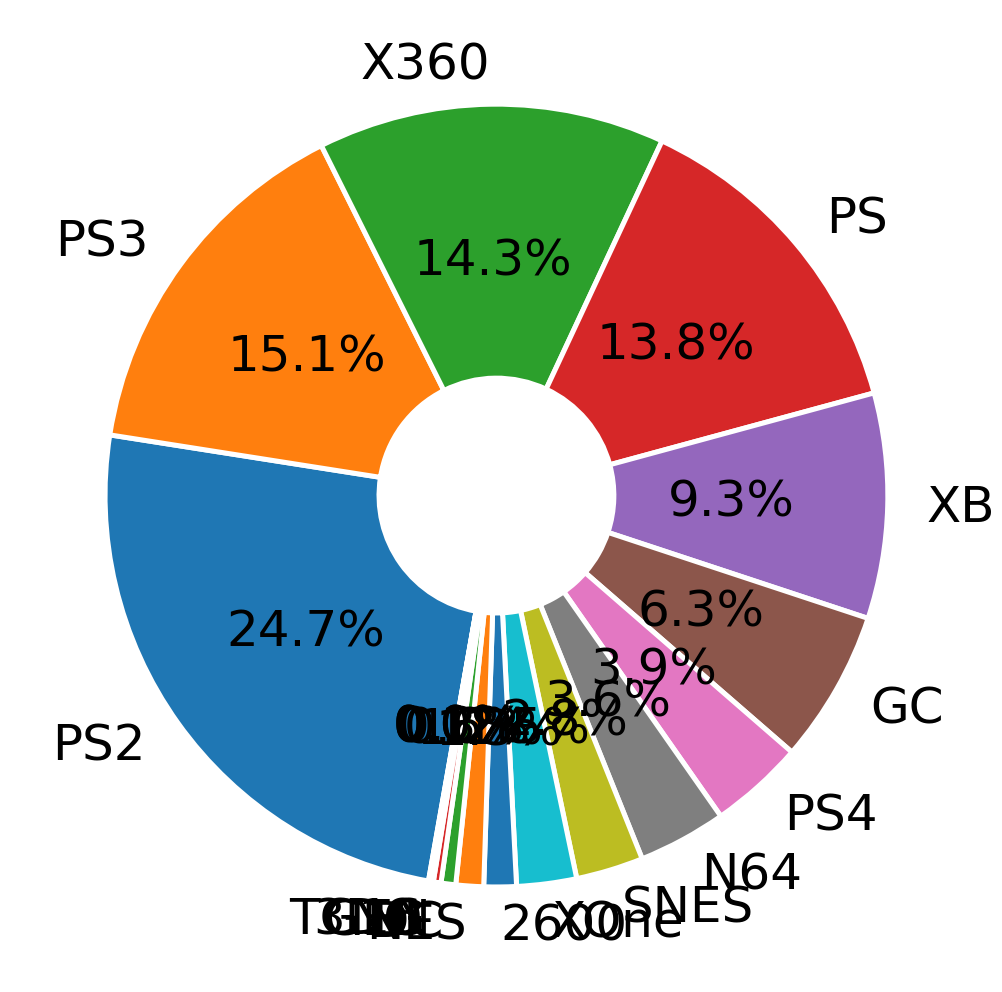

In [38]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(18,18))
plt.rc('font', size=50)        # 기본 폰트 크기
plt.pie(df_Console.Platform.value_counts(), labels=Platform_list, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.show()

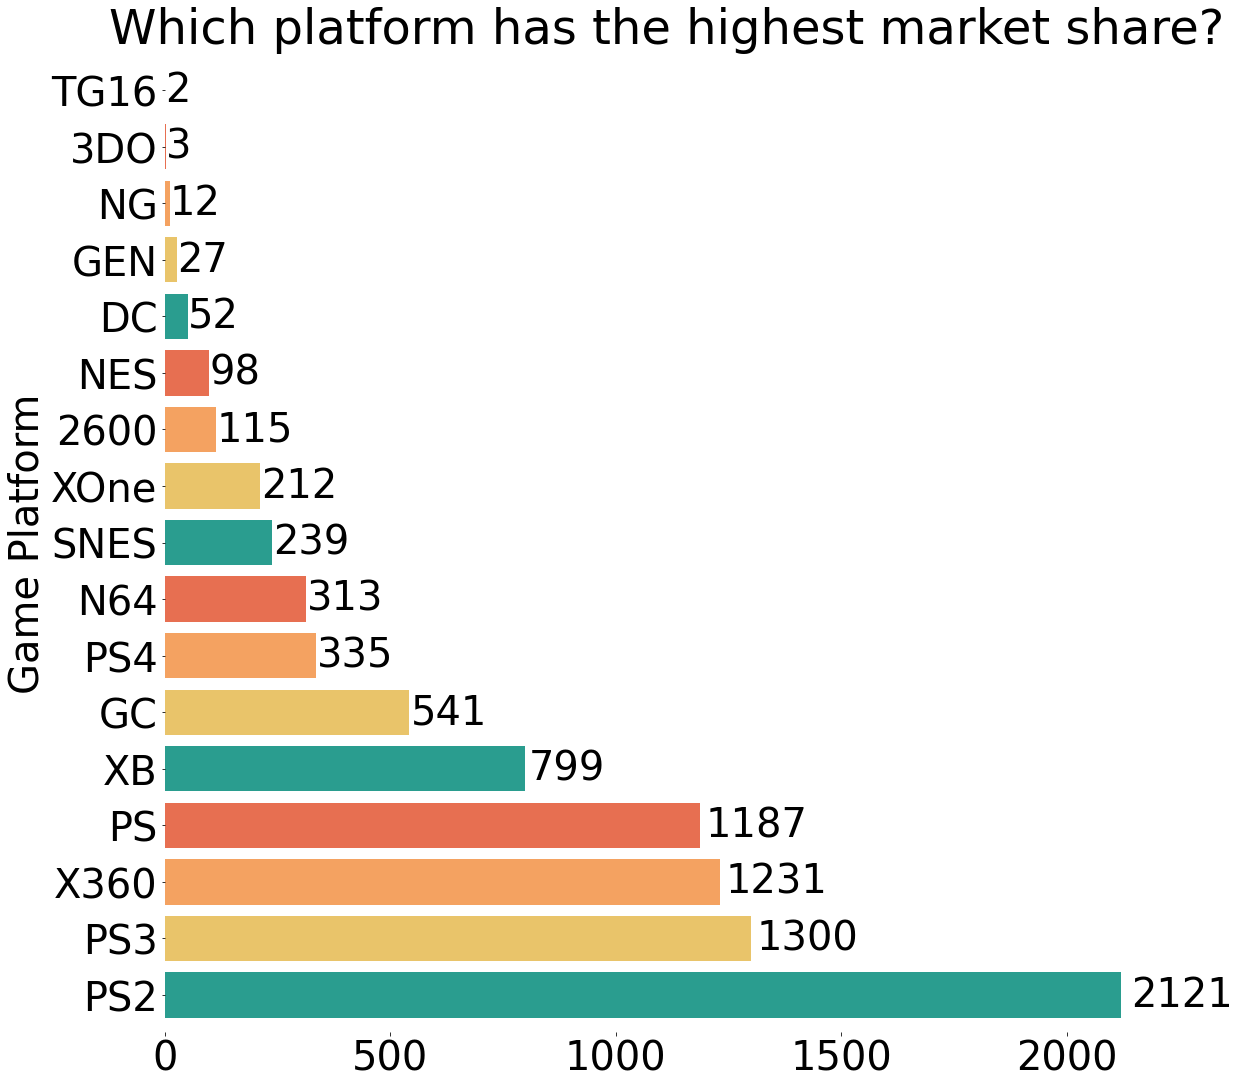

In [39]:

plt.figure(figsize=(18,18))
plt.rc('font', size=40)
ax = df_Console.Platform.value_counts().plot.barh(x='lang', y='val', xlabel="Game Platform", title="Which platform has the highest market share?", width=0.8, color=['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'], legend=False)
plt.box(False)

for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.f"%(width), va='center')


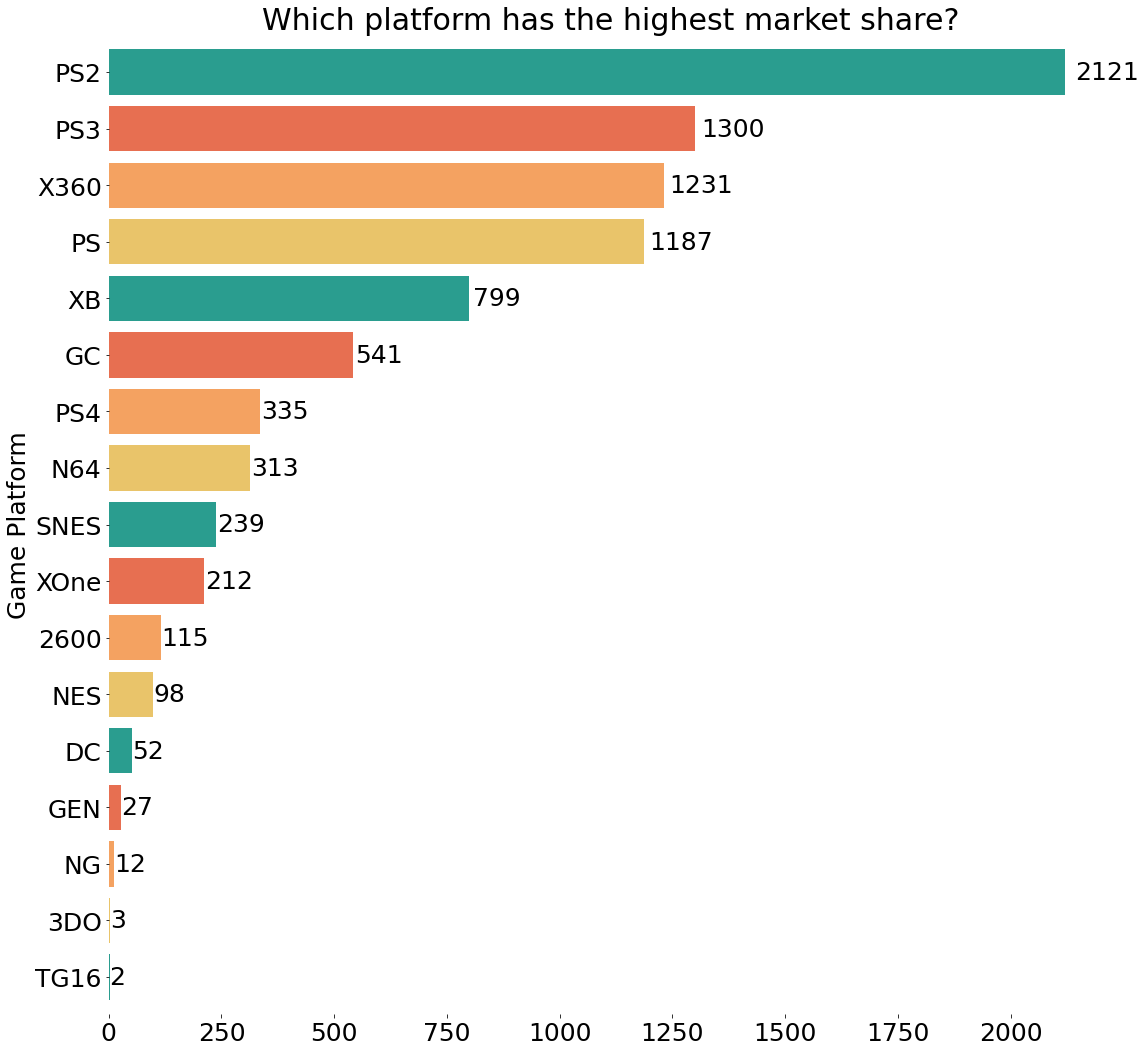

In [40]:
plt.figure(figsize=(18,18))
plt.rc('font', size=25)
ax = df_Console.Platform.value_counts().sort_values().plot.barh(x='lang', y='val', xlabel="Game Platform", title="Which platform has the highest market share?", width=0.8, color=['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'], legend=False)
plt.box(False)

for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.f"%(width), va='center')


#년도 별 인기 장르 

In [41]:
trand = df_Console.loc[:,['Year','Genre']]

In [42]:
trand = trand.sort_values(['Year'])

In [43]:
trand.reset_index(drop=True, inplace = True)

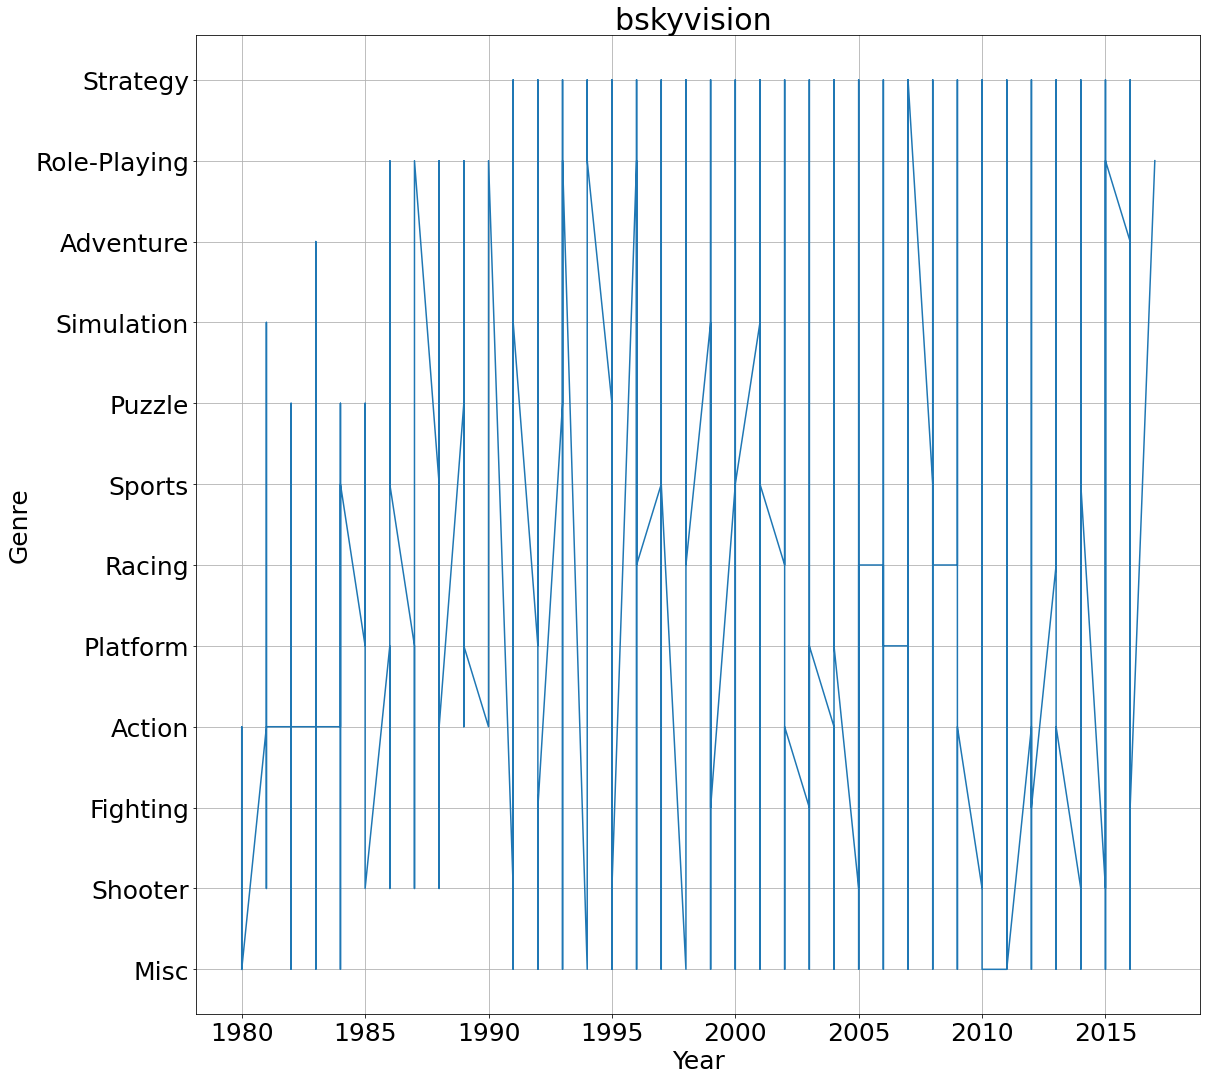

In [44]:
plt.figure(figsize=(18,18))

plt.plot(trand['Year'], trand['Genre'])
plt.title('bskyvision ')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.grid(True)
plt.show()

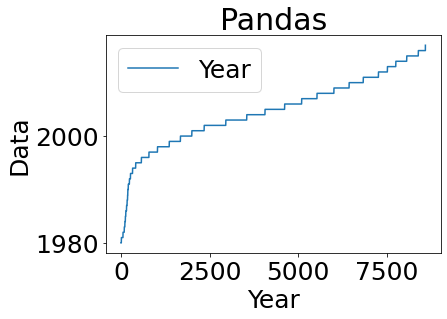

In [45]:
trand.plot()
plt.title("Pandas")
plt.xlabel("Year")
plt.ylabel("Data")
plt.show()

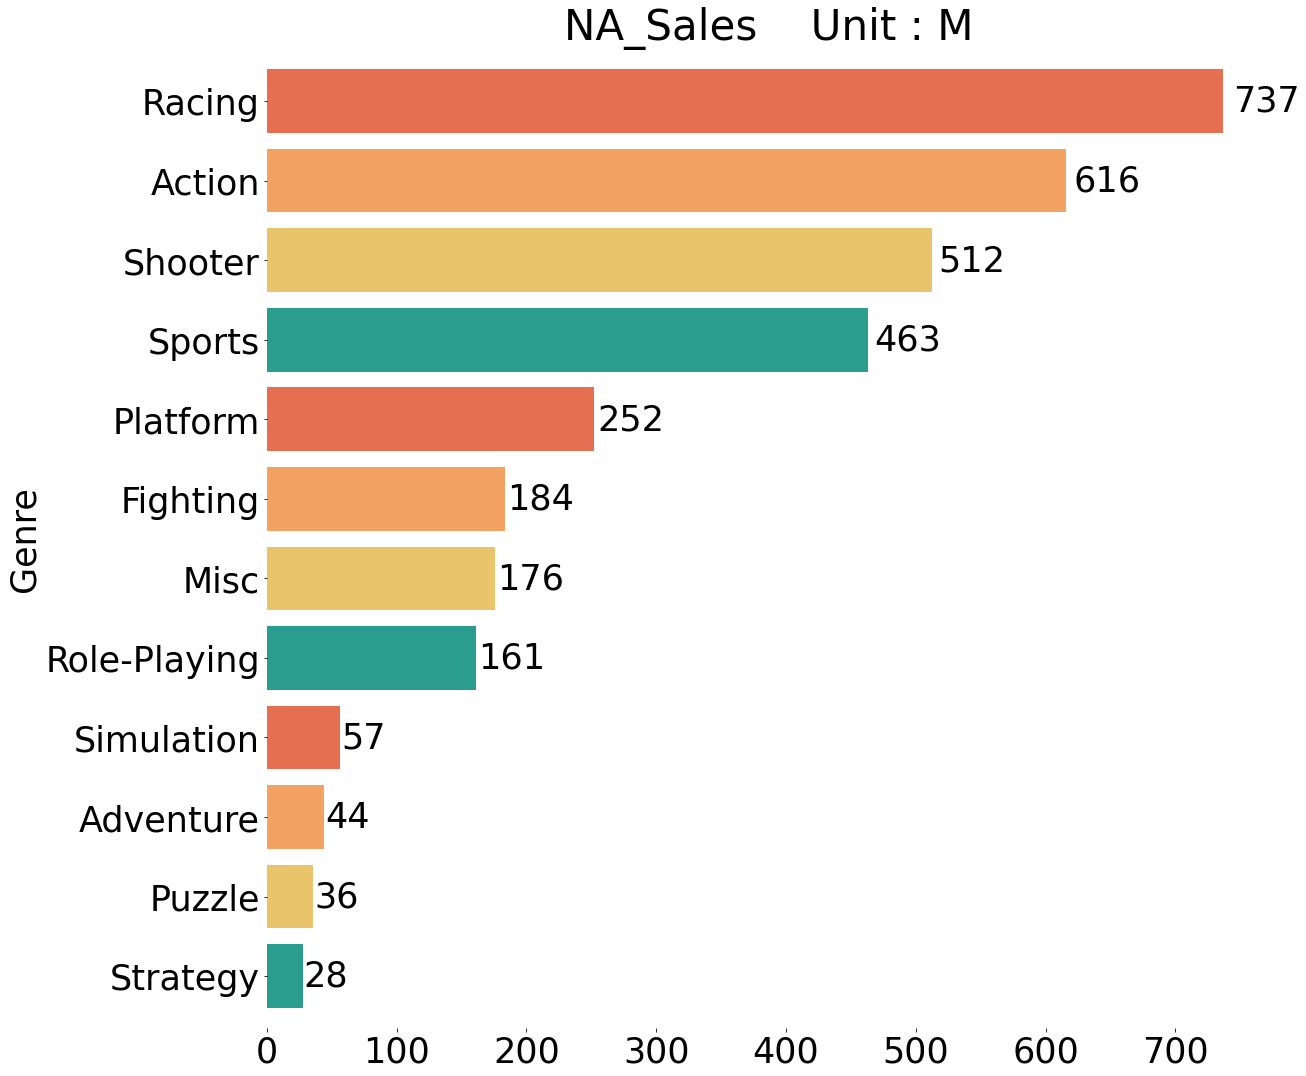

In [46]:
plt.figure(figsize=(18,18))
plt.rc('font', size=35)
ax = df_Console.groupby('Genre')['NA_Sales'].aggregate('sum').sort_values().plot.barh(x='lang', y='val',xlabel="Genre", title="NA_Sales    Unit : M", width=0.8, color=['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'])
plt.box(False)


for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.f"%(width), va='center')

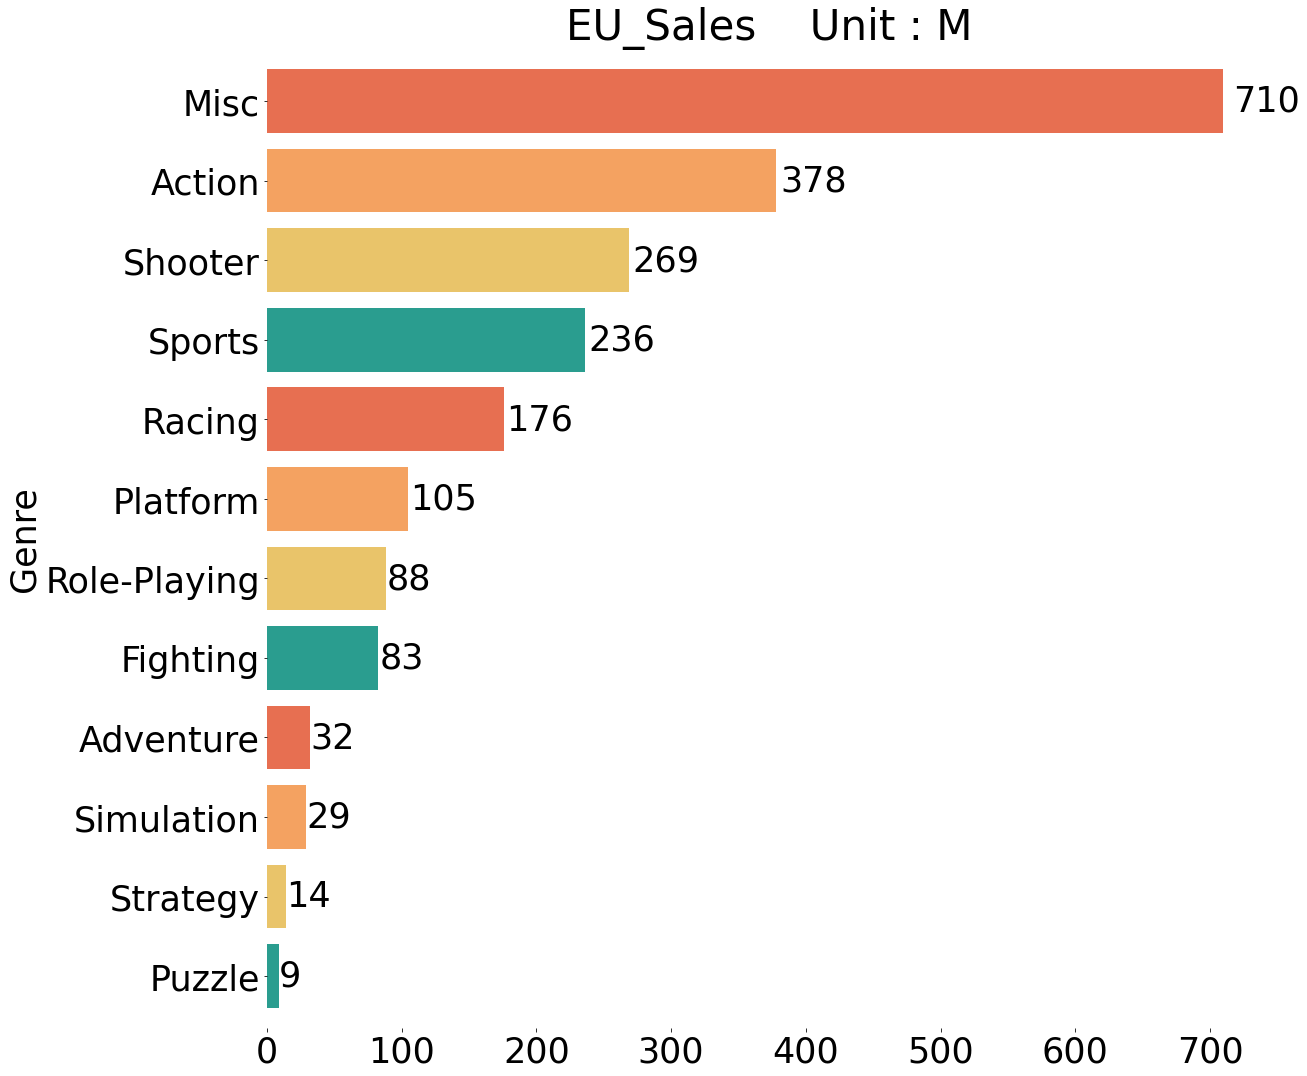

In [47]:
plt.figure(figsize=(18,18))
plt.rc('font', size=35)
ax = df_Console.groupby('Genre')['EU_Sales'].aggregate('sum').sort_values().plot.barh(x='lang', y='val',xlabel="Genre", title="EU_Sales    Unit : M", width=0.8, color=['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'])
plt.box(False)


for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.f"%(width), va='center')

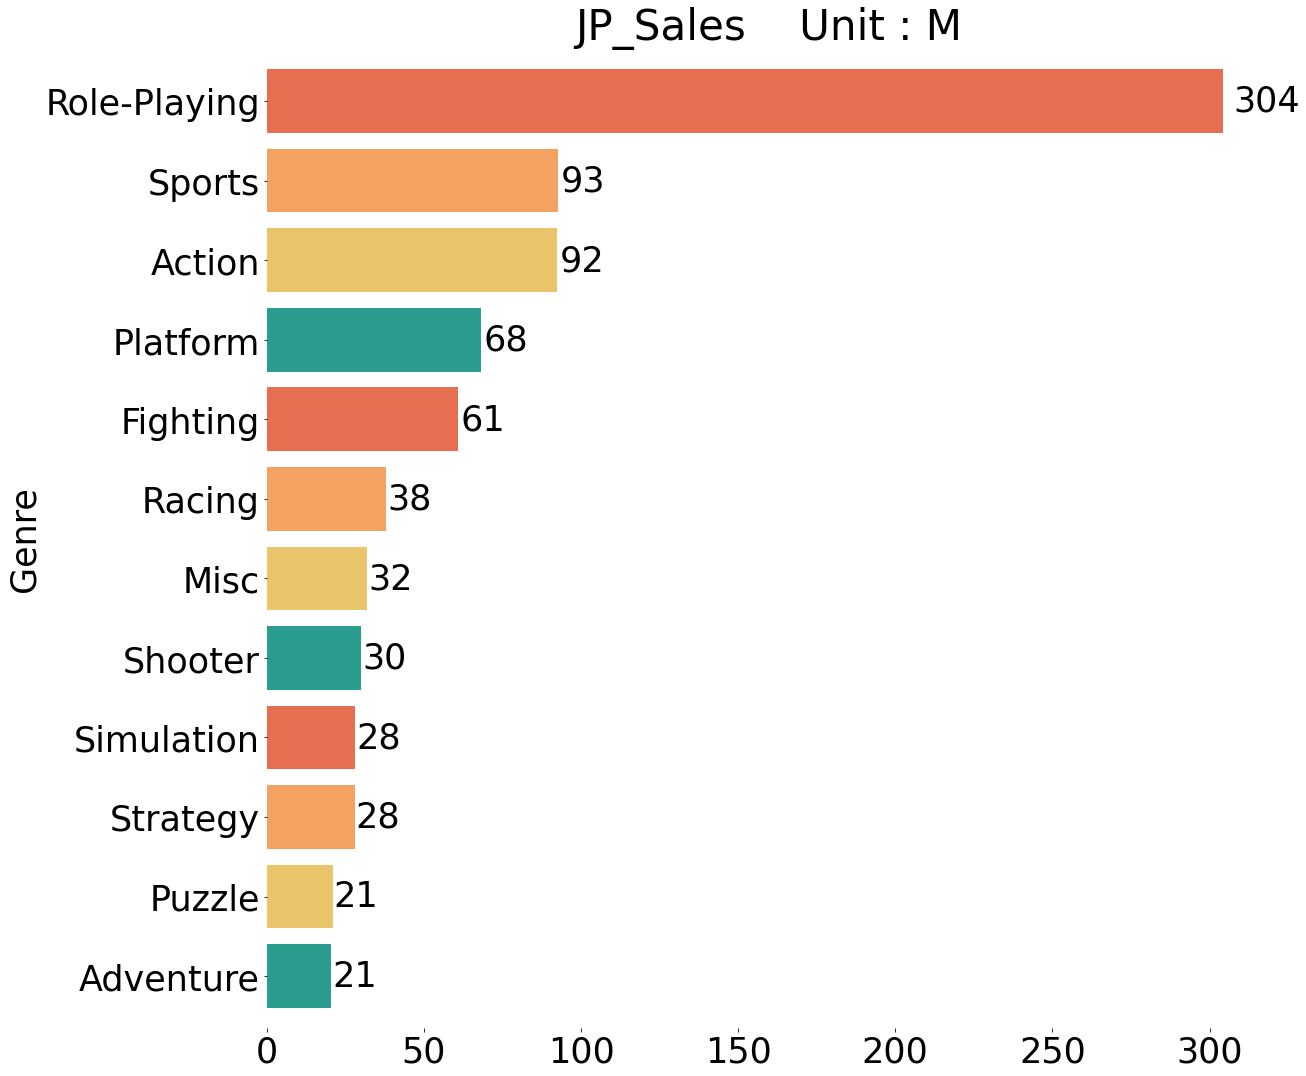

In [48]:
plt.figure(figsize=(18,18))
plt.rc('font', size=35)
ax = df_Console.groupby('Genre')['JP_Sales'].aggregate('sum').sort_values().plot.barh(x='lang', y='val',xlabel="Genre", title="JP_Sales    Unit : M", width=0.8, color=['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'])
plt.box(False)


for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.f"%(width), va='center')

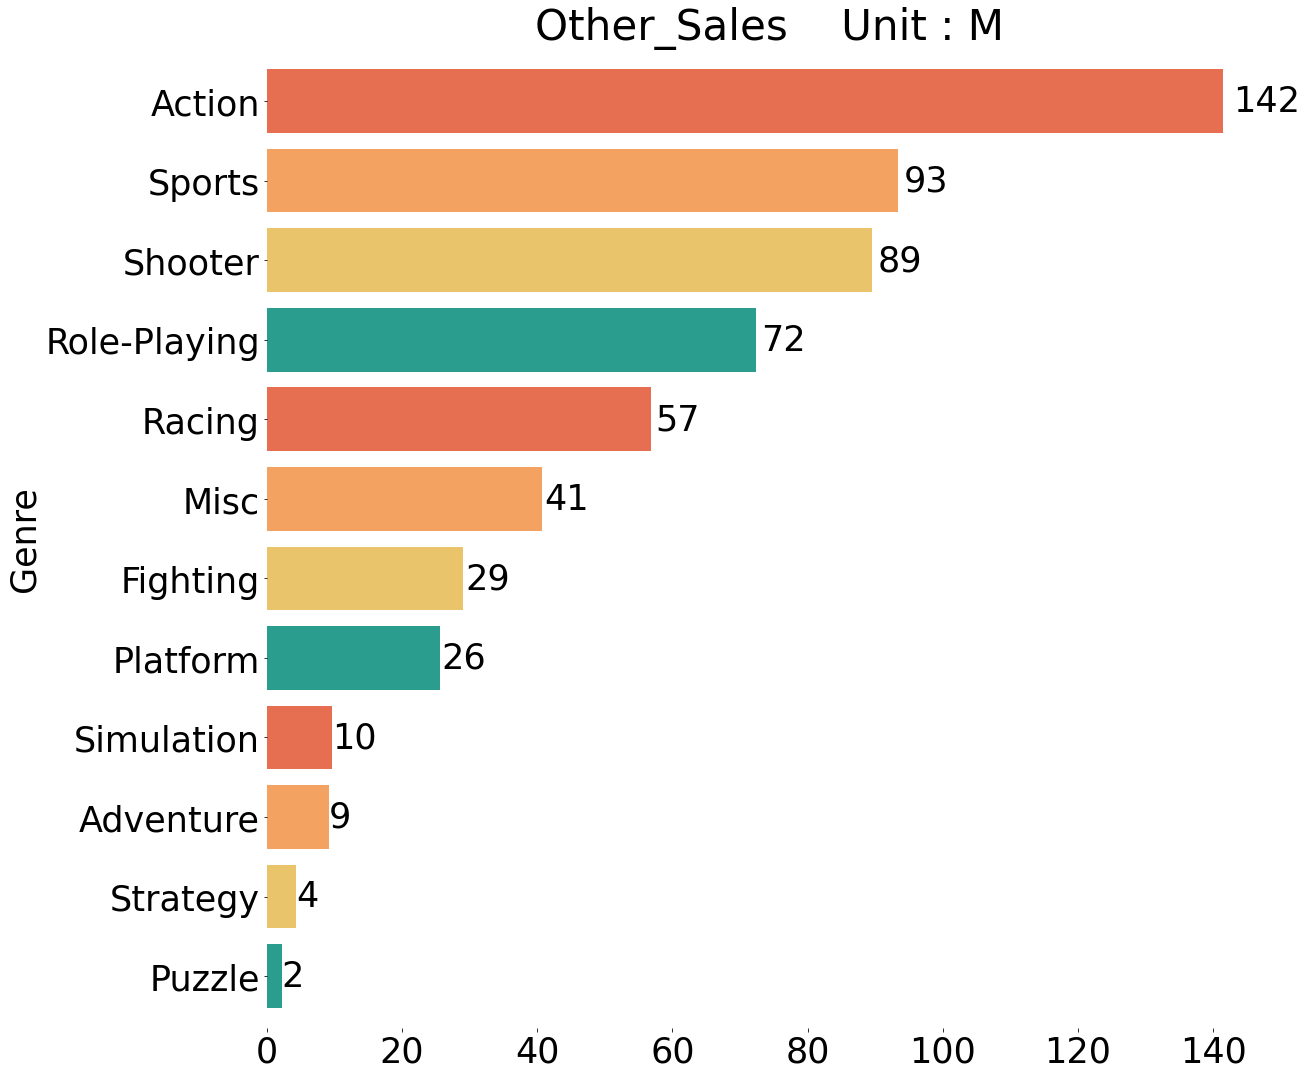

In [49]:
plt.figure(figsize=(18,18))
plt.rc('font', size=35)
ax = df_Console.groupby('Genre')['Other_Sales'].aggregate('sum').sort_values().plot.barh(x='lang', y='val',xlabel="Genre", title="Other_Sales    Unit : M", width=0.8, color=['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'])
plt.box(False)


for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.f"%(width), va='center')

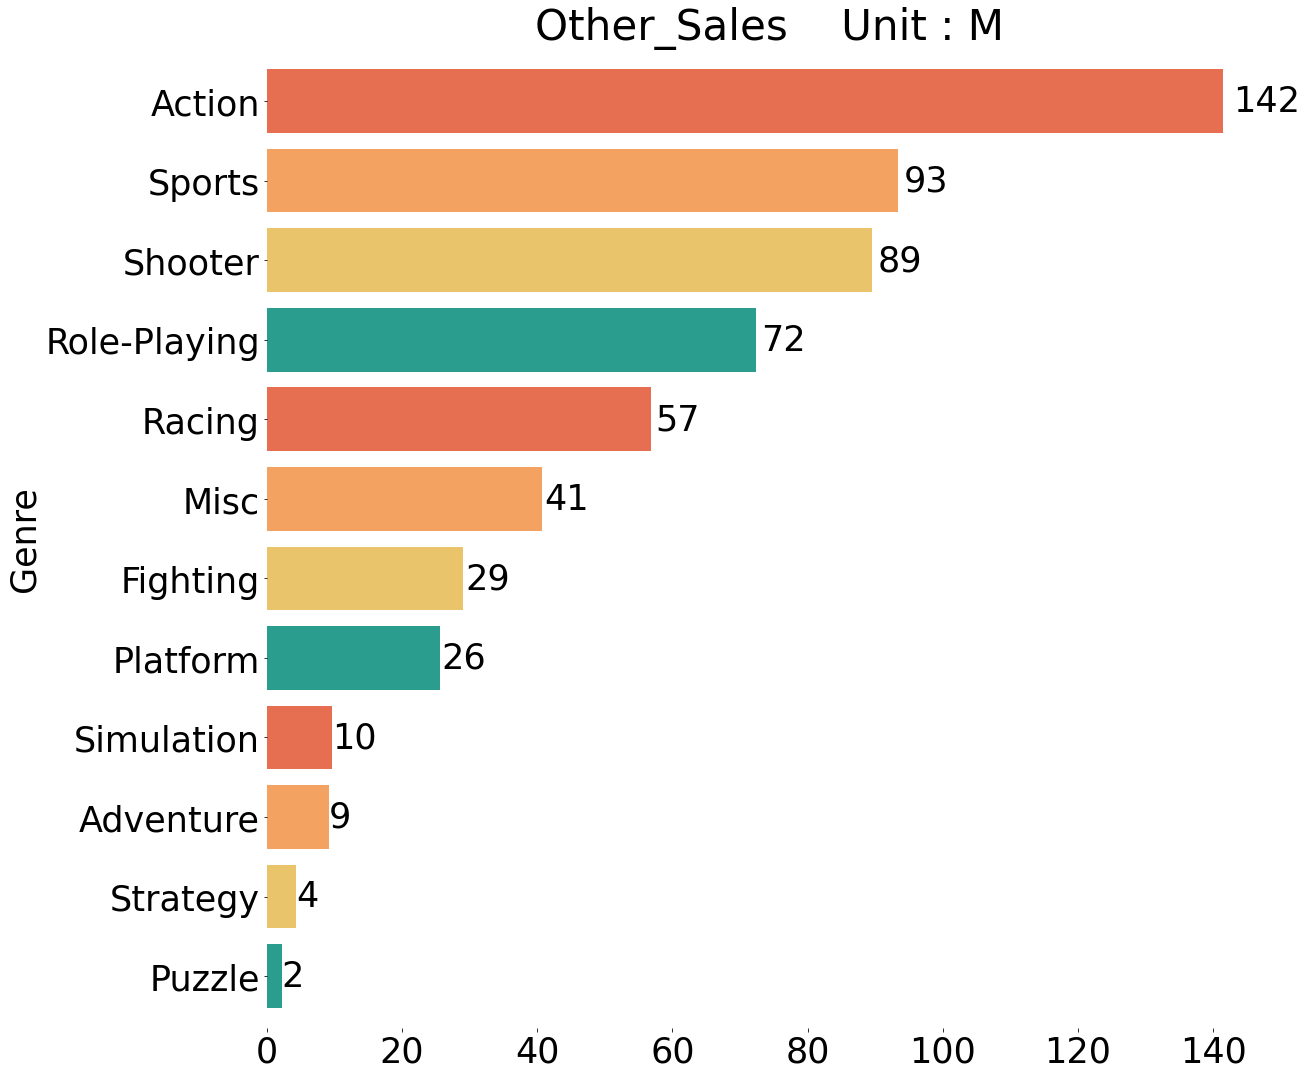

In [50]:
plt.figure(figsize=(18,18))
plt.rc('font', size=35)
ax = df_Console.groupby('Genre')['Other_Sales'].aggregate('sum').sort_values().plot.barh(x='lang', y='val',xlabel="Genre", title="Other_Sales    Unit : M", width=0.8, color=['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'])
plt.box(False)


for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.f"%(width), va='center')

In [51]:
df_Console_T = df_Console

In [52]:
df_Console_T['Total_sales'] = df_Console['NA_Sales']+df_Console['JP_Sales']+df_Console['EU_Sales']+df_Console['Other_Sales']

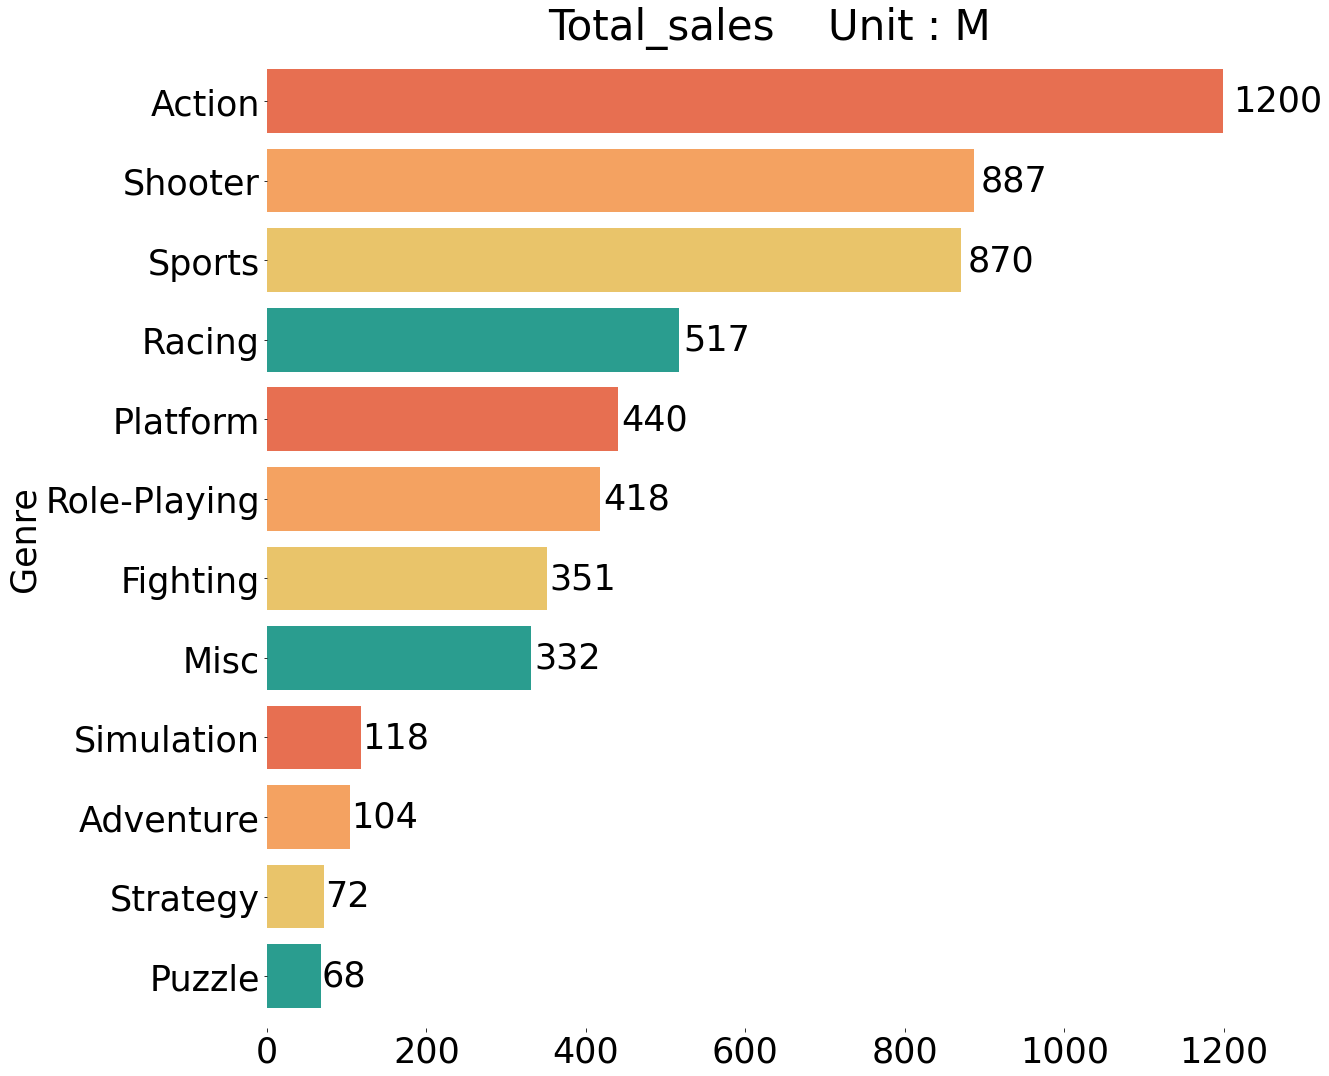

In [53]:
plt.figure(figsize=(18,18))
plt.rc('font', size=35)
ax = df_Console_T.groupby('Genre')['Total_sales'].aggregate('sum').sort_values().plot.barh(x='lang', y='val',xlabel="Genre", title="Total_sales    Unit : M", width=0.8, color=['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'])
plt.box(False)


for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.f"%(width), va='center')

#지역별 선호 장르 끝

In [54]:
trand['Genre_Count'] = 1

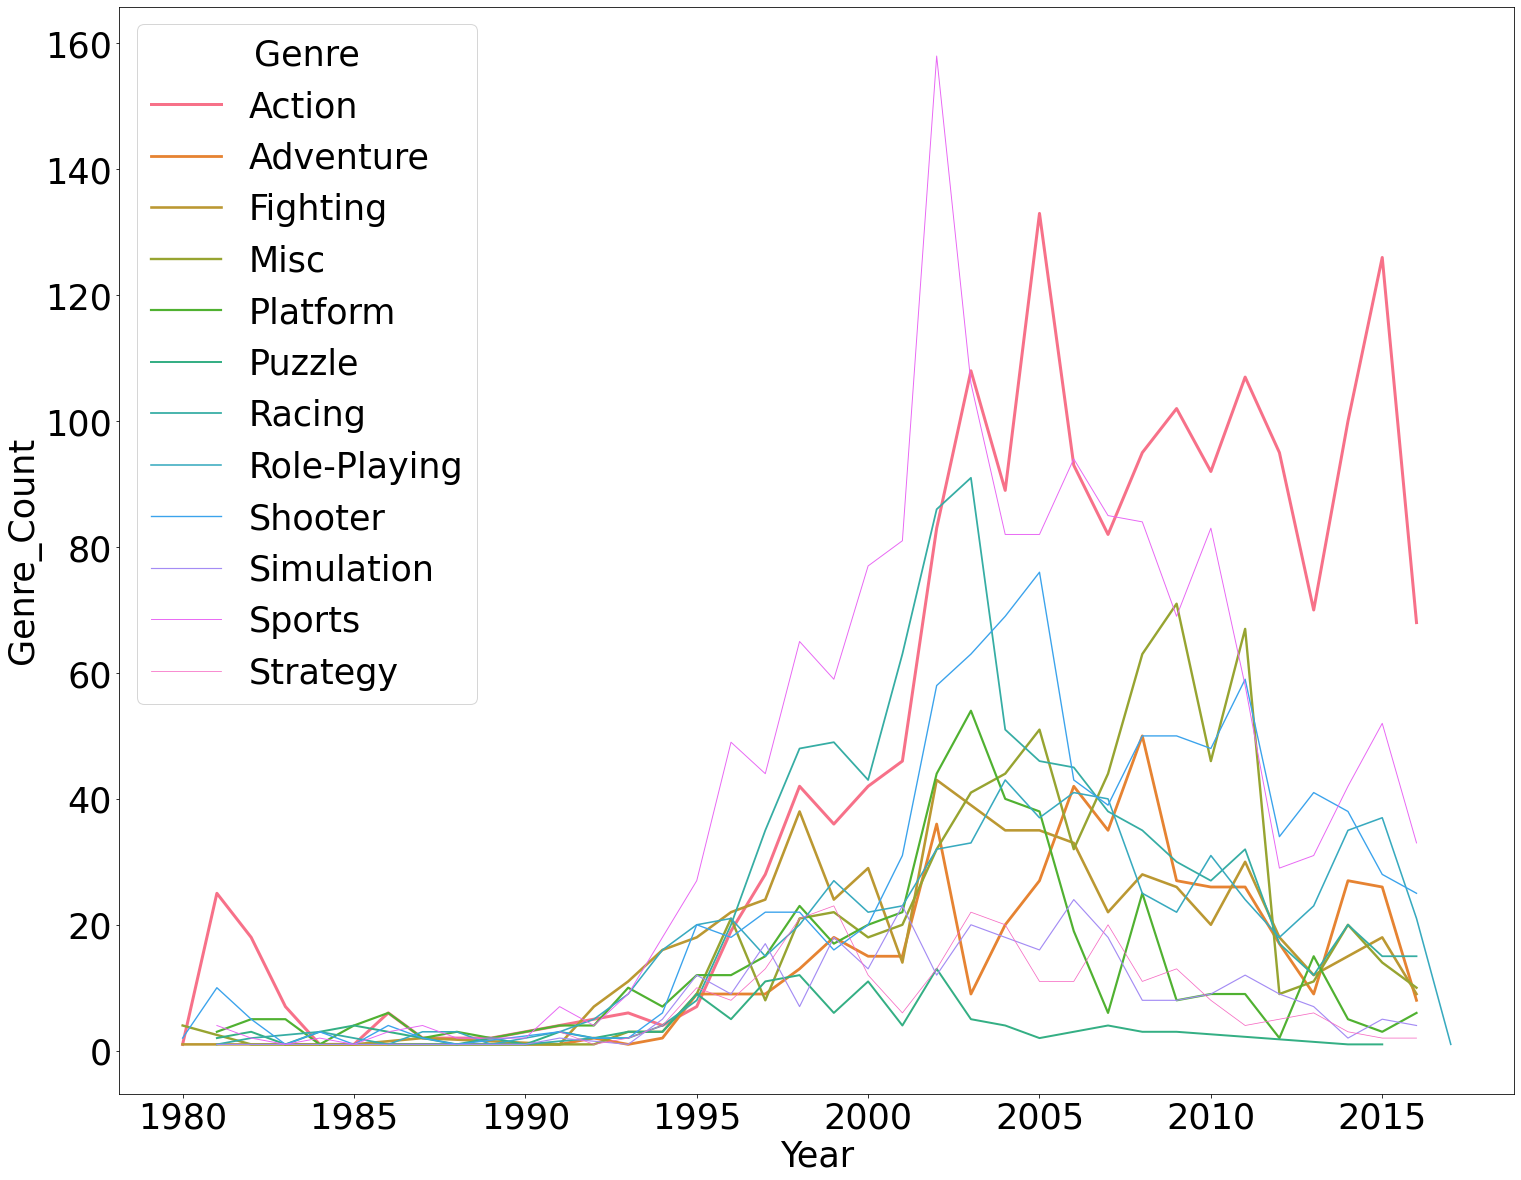

In [55]:
fig = plt.figure(figsize=(25, 20))
sns.lineplot(data=trand.groupby(['Genre','Year']).sum(),x='Year',y= 'Genre_Count',hue='Genre',size='Genre')
plt.show()

#연도 별 선호장르 끝

In [56]:
df_Console = df_Console.dropna()

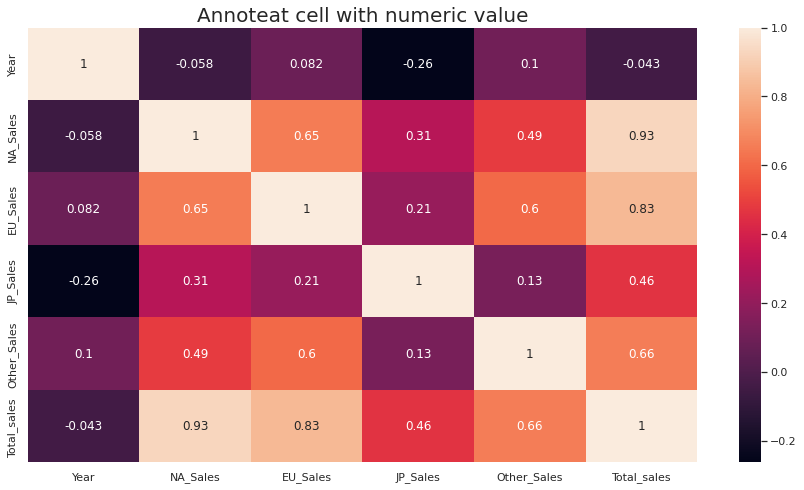

In [57]:
aid_corr = df_Console.corr()

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(aid_corr, annot=True)
plt.title('Annoteat cell with numeric value', fontsize=20)
plt.show()

In [58]:
df_game_name = df_Console['Name']

In [59]:
df_game_name = pd.DataFrame(df_game_name)
df_game_name

,Name
0,Ben 10 Ultimate Alien: Cosmic Destruction
1,Imabikisou
2,The Penguins of Madagascar: Dr. Blowhole Retur...
3,Mini Ninjas
4,Hajime no Ippo: The Fighting! (2014)
...,...
8378,AeroFighters Assault
8379,3D Baseball
8380,Super Fire ProWrestling X
8381,S.C.A.R.S


In [60]:
df_pca_sales = df_Console.drop(labels=['Platform','Year','Genre','Publisher'],axis=1,)

In [61]:
df_pca_sales = df_pca_sales.dropna()

In [62]:
scaler = StandardScaler()
Name = df_pca_sales.pop('Name')

Z = scaler.fit_transform(df_pca_sales)

print("\n Standardized Data: \n", Z)
pca = PCA() 
pca.fit(Z)



 Standardized Data: 
 [[-0.25328091 -0.19964329 -0.29199796 -0.1045156  -0.28419442]
 [-0.40120075 -0.40706127 -0.13978935 -0.28986663 -0.4366779 ]
 [-0.35189414 -0.33792194 -0.29199796 -0.24352887 -0.40763343]
 ...
 [-0.40120075 -0.40706127  0.77346233 -0.28986663 -0.26241107]
 [-0.33956748 -0.33792194 -0.29199796 -0.24352887 -0.40037231]
 [-0.40120075 -0.40706127 -0.21589366 -0.28986663 -0.45120013]]


PCA()

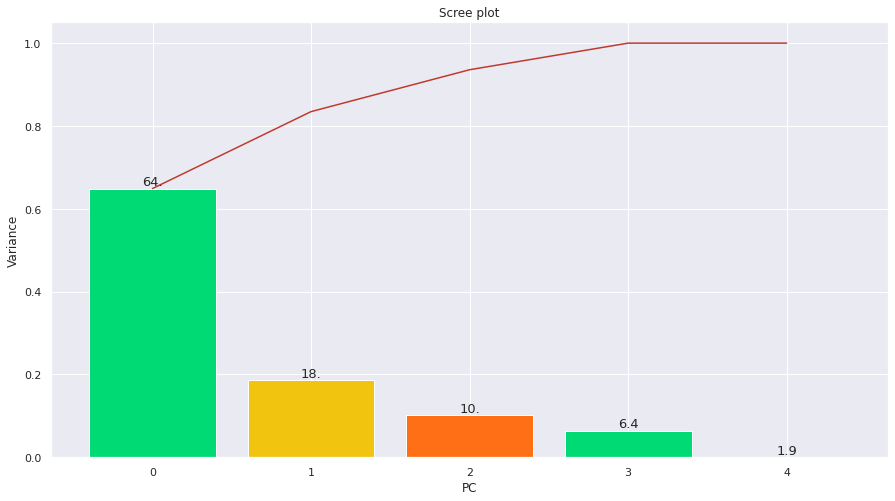

In [63]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

In [64]:
pca = PCA(2) 
pca.fit(Z)

B = pca.transform(Z)
data_set= pd.DataFrame(B, columns=['pc1','pc2'])
print("\n Projected Data(Z): \n")
data_set


 Projected Data(Z): 



,pc1,pc2
0,-0.490927,-0.198354
1,-0.784658,0.043010
2,-0.730170,-0.123612
3,-0.319740,-0.263851
4,-0.798073,0.008520
...,...,...
8378,-0.627806,-0.104099
8379,-0.803235,-0.098296
8380,-0.462685,0.870784
8381,-0.720145,-0.123008


#쓰..쓸데없는짓 완료..

전체 매출과 gta 매출 비교

In [65]:
df_Console

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
0,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
1,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00,0.04
2,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01,0.08
3,Mini Ninjas,PS3,2009.0,Action,Eidos Interactive,0.14,0.16,0.00,0.06,0.36
4,Hajime no Ippo: The Fighting! (2014),PS3,2014.0,Sports,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...
8378,AeroFighters Assault,N64,1997.0,Action,Video System,0.15,0.04,0.00,0.00,0.19
8379,3D Baseball,PS,1996.0,Sports,BMG Interactive Entertainment,0.02,0.01,0.00,0.00,0.03
8380,Super Fire ProWrestling X,SNES,1995.0,Fighting,Human Entertainment,0.00,0.00,0.28,0.00,0.28
8381,S.C.A.R.S,PS,1998.0,Racing,Ubisoft,0.05,0.03,0.00,0.01,0.09


In [81]:
df_Console.Total_sales.sum().round(2)

5376.79

In [67]:
gta_sum = df_Console[df_Console['Name'].str.contains("Grand Theft")]

In [68]:
gta = df_Console[df_Console['Genre'] == 'Action'].sort_values(['Total_sales'], ascending=False).head(10)

In [84]:
df_Console[df_Console['Genre'] == 'Action'].sort_values(['Total_sales'], ascending=False).sum()

Name           Grand Theft Auto VGrand Theft Auto: San Andrea...
Platform       PS3PS2X360PS2PS2PS4X360PS3PS3PS3PS3PS3NESX360P...
Year                                                   3417063.0
Genre          ActionActionActionActionActionActionActionActi...
Publisher      Take-Two InteractiveTake-Two InteractiveTake-T...
NA_Sales                                                  600.34
EU_Sales                                                  370.82
JP_Sales                                                   89.42
Other_Sales                                               138.96
Total_sales                                              1199.54
dtype: object

In [69]:
gta_sum

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
426,Grand Theft Auto: Vice City Stories,PS2,2007.0,Action,Take-Two Interactive,0.78,0.03,0.03,0.13,0.97
503,"Grand Theft Auto: Mission Pack #1, London 1969",PS,1998.0,Adventure,Take-Two Interactive,0.06,0.04,0.00,0.01,0.11
1037,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
1764,Rockstar Games Double Pack: Grand Theft Auto I...,PS2,2003.0,Action,Take-Two Interactive,0.85,0.66,0.00,0.22,1.73
1784,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1861,Grand Theft Auto: San Andreas,X360,2008.0,Action,Take-Two Interactive,0.08,0.03,0.00,0.01,0.12
2677,Rockstar Games Double Pack: Grand Theft Auto I...,XB,2003.0,Action,Take-Two Interactive,1.84,0.56,0.00,0.09,2.49
2708,Grand Theft Auto: Liberty City Stories,PS2,2006.0,Action,Take-Two Interactive,1.56,1.40,0.07,0.50,3.53
2718,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
4908,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10


In [70]:
gta_sum.Total_sales.sum().round(2)

143.16

In [71]:
df_Console.iloc[1764]

Name           Rockstar Games Double Pack: Grand Theft Auto I...
Platform                                                     PS2
Year                                                      2003.0
Genre                                                     Action
Publisher                                   Take-Two Interactive
NA_Sales                                                    0.85
EU_Sales                                                    0.66
JP_Sales                                                     0.0
Other_Sales                                                 0.22
Total_sales                                                 1.73
Name: 1764, dtype: object

In [85]:
gta_plot = pd.DataFrame({'sales':[1199.54, 143.16],
                             'name':['Other', 'Grand Theft Auto']})

In [86]:
gta_plot

,sales,name
0,1199.54,Other
1,143.16,Grand Theft Auto


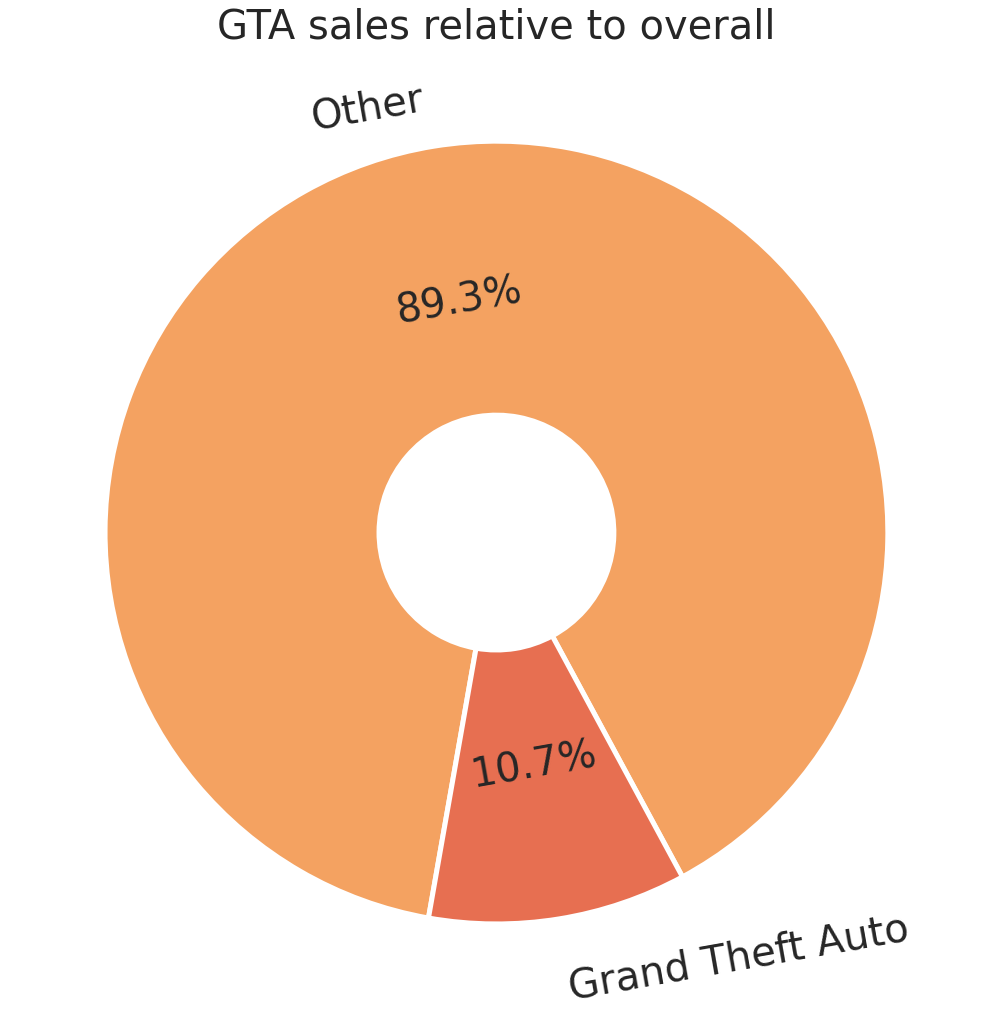

In [92]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(18,18))
plt.rc('font', size=40)      
colors = ['#f4a261', '#e76f51']
textprops = dict(rotation=10,size=40, weight=3)

plt.pie(gta_plot.sales, labels=['Other','Grand Theft Auto'],autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops, colors=colors,textprops=textprops)
plt.title("GTA sales relative to overall",size=40)
plt.show()


전체 게임 매출 중 GTA 매출 비율

In [79]:
df_Console[df_Console['Genre'] == 'Action'].sort_values(['Total_sales'], ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
1784,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
7370,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
5486,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2718,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
4908,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
1037,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
6997,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.03
8275,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58
4539,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.25
5970,Uncharted 3: Drake's Deception,PS3,2011.0,Action,Sony Computer Entertainment,2.77,2.80,0.19,1.06,6.82
